<a href="https://colab.research.google.com/github/sucheerarighthere/bsc_dpdm22/blob/main/midterm_dpdm22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## การเตรียมข้อมูลประกอบด้วย กำจัด outlier, แก้ missing, normalization, one-hot-encoder และ อื่นๆ ที่นักศึกษาเห็นว่าเหมาะสม

# 1 ทำนายราคาบ้าน 10 คะแนน
เตรียมข้อมูลเพื่อทำนายราคาบ้าน ราคาประเมินบ้าน และ คะแนนทรัพย์ จาก [google drive](https://drive.google.com/drive/folders/1uIcUFY1yldIq-A3wijh2n2N6az-EljIe?usp=sharing) โดยข้อมูลที่เตรียมต้องประกอบด้วย columns ต่อไปนี้

* ```'renovate','number_of_rai','number_of_ngan','number_of_va','number_of_story','number_of_bedroom','number_of_bathroom','direction','furniture','usable_area','number_of_parking', 'sell_price'``` จากตาราง "คำตอบนักประเมิน(ID)"

* ```จำนวน 7-11 และ โรงเรียน ในรัศมี 200,500,1000,2000 เมตร (ตั้งชื่อ d200-7/11','d500-7/11',...,'d2000-7/11' แบะ ;d200-school','d500-school',...,'d2000-school')``` จากตาราง "7-eleven.json" และ "school.json"

* ```ประเมินราคาซื้อขาย และ คะแนนทรัพย์ (ตั้งชื่อ 'estimator' และ 'score')``` จากตาราง คำตอบนักประเมิน(ID) โดยราคาประเมินกับคะแนนทรัพย์ อ้างอิงของนักประเมิน ID=01 คนเดียว

In [573]:
import pandas as pd
import numpy as np
import json

In [574]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [575]:
 estimate= pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/MIDterm/คำตอบนักประเมิน(ID).xlsx') #นำเข้าตาราง คำตอบนักประเมินโดยการใช้ pd.read

In [576]:
estimate.head()

,ID ผู้ประเมิน,post id,ID,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์
0,1.0,https://nayoo.co/khonkaen/posts/25,25.0,บ้านเดี่ยว,มั่นใจ,2890000.0,2500000.0,"5,000-15,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1,2.0,https://nayoo.co/khonkaen/posts/25,25.0,บ้านเดี่ยว,มั่นใจ,2890000.0,2700000.0,"โครงการนี้ราคาเสนอขาย 2,500,000-3,000,000 บาท/...",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
2,1.0,https://nayoo.co/khonkaen/posts/33,33.0,บ้านเดี่ยว,มั่นใจ,2600000.0,2200000.0,"5,000-15,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
3,2.0,https://nayoo.co/khonkaen/posts/33,33.0,บ้านเดี่ยว,มั่นใจ,2600000.0,2400000.0,"ราคาเสนอขายประมาณ 2,200,000 - 2,500,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
4,1.0,https://nayoo.co/khonkaen/posts/495,495.0,บ้านเดี่ยว,มั่นใจ,6050000.0,5000000.0,"5,000-15,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


In [577]:
estimate.columns

Index(['ID ผู้ประเมิน', 'post id', 'ID', 'property_type',
       'ความมั่นใจในการเมินราคาทรัพย์', 'ราคาทรัพย์', 'ประเมินราคาซื้อ-ขาย',
       'ปัจจัยในการประเมินราคาซื้อ-ขาย', 'เหตุผลไม่มั่นใจราคาประเมิน',
       'ให้คะแนนทรัพย์'],
      dtype='object')

In [578]:
datahouse = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/MIDterm/Data House.xlsx') #นำเข้าตารางdata house โดยการใช้ pd.read

In [579]:
datahouse.columns

Index(['id', 'name_th', 'name_en', 'project_name', 'company', 'province',
       'district', 'sub_district', 'property_type', 'home improvement',
       'renovate', 'public utility', 'land type', 'land wide(m)',
       'land long(m)', 'topsoil', 'corner', 'zip_code', 'zone', 'alley',
       'street', 'latitude', 'longitude', 'number_of_rai', 'number_of_ngan',
       'number_of_va', 'construct_year', 'model', 'sell_price',
       'number_of_unit', 'number_of_story', 'number_of_bedroom',
       'number_of_bathroom', 'number_of_parking', 'usable_area',
       'central_cost', 'direction', 'furniture', 'building_number',
       'number_of_building', 'floor_number', 'parking_percentage', 'has_pool',
       'has_keycard', 'has_security', 'has_fitness', 'has_garden'],
      dtype='object')

In [580]:
datahouse.head()

,id,name_th,name_en,project_name,company,province,district,sub_district,property_type,home improvement,...,furniture,building_number,number_of_building,floor_number,parking_percentage,has_pool,has_keycard,has_security,has_fitness,has_garden
0,1.0,บ้านเดี่ยว ชนบท ขอนแก่น,บ้านเดี่ยว ชนบท ขอนแก่น,บ้านวังเวิน,NaN,ขอนแก่น,ชนบท,ศรีบุญเรือง,บ้านเดี่ยว,no,...,ไม่มี,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,บ้านเดี่ยว น้ำพอง ขอนแก่น,บ้านเดี่ยว น้ำพอง ขอนแก่น,บ้านหนองบัวบาน,NaN,ขอนแก่น,น้ำพอง,ทรายมูล,บ้านเดี่ยว,no,...,ไม่มี,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16.0,บ้านเดี่ยว มัญจาคีรี ขอนแก่น,บ้านเดี่ยว มัญจาคีรี ขอนแก่น,NaN,NaN,ขอนแก่น,มัญจาคีรี,กุดเค้า,บ้านเดี่ยว,no,...,ไม่ระบุ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18.0,บ้านเดี่ยว เมืองขอนแก่น หมู่บ้านชลลดา,บ้านเดี่ยว เมืองขอนแก่น หมู่บ้านชลลดา,ชลลดา ขอนแก่น,บริษัท แลนด์แอนด์เฮ้าส์ จำกัด (มหาชน),ขอนแก่น,เมืองขอนแก่น,บ้านเป็ด,บ้านเดี่ยว,no,...,ไม่ระบุ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19.0,บ้านเดี่ยว เมืองขอนแก่น หมู่บ้านเบสต์โฮม,บ้านเดี่ยว เมืองขอนแก่น หมู่บ้านเบสต์โฮม,เบสท์โฮม,เบสท์โฮม เลี่ยงเมืองขอนแก่น,ขอนแก่น,เมืองขอนแก่น,บ้านเป็ด,บ้านเดี่ยว,no,...,ไม่ระบุ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


นำเข้า json file



In [581]:
with open('/content/drive/MyDrive/bsc_DPDM_data/MIDterm/7-eleven.json') as s:
  seven = json.loads(s.read()) # read json file

In [582]:
with open('/content/drive/MyDrive/bsc_DPDM_data/MIDterm/school.json') as f:
  school = json.loads(f.read())

# Edit Table

In [583]:
seven_id = {}#สร้างดิกขึ้นมาเก็บเพื่อจะดึงไอดีที่มีทั้งคู่ขึ้นมาเทียบ สร้างโปรแกรมสร้างลิสเข้ามาเก็บ ดูลูปดีๆว่าโดนรีเซ็ทไปหรือยัง
for t in seven:
    l = list()
    for x in seven[t]:
        l.append(x['geometry']['location'])
    print(t)    # T is id fromthis json file
    print(l) #l คือ ลลิสต์ที่เราสร้างมาเฉพาะในลูป
    seven_id[t]=l #dictนี้ ที่อินเด็กซ์เป็นตัวที(ไอดี)สมชิกของมันคือ [l]

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
6284
[]
6285
[{'lat': 16.3280289, 'lng': 102.8466104}]
6286
[]
6289
[]
6290
[]
6291
[{'lat': 16.760925, 'lng': 102.6348166}]
6292
[{'lat': 16.3280289, 'lng': 102.8466104}]
6296
[{'lat': 16.5219606, 'lng': 102.219816}]
6297
[]
6298
[{'lat': 16.4501543, 'lng': 102.7382279}, {'lat': 16.4481776, 'lng': 102.7736213}, {'lat': 16.4496233, 'lng': 102.7578029}, {'lat': 16.4512684, 'lng': 102.7517798}]
6302
[]
6306
[]
6310
[]
6311
[]
6313
[{'lat': 16.4506978, 'lng': 102.7955315}, {'lat': 16.4786388, 'lng': 102.814293}, {'lat': 16.4794698, 'lng': 102.8070934}, {'lat': 16.4423, 'lng': 102.808299}, {'lat': 16.4802561, 'lng': 102.8118345}, {'lat': 16.4800345, 'lng': 102.817991}, {'lat': 16.4800801, 'lng': 102.8157501}, {'lat': 16.4421359, 'lng': 102.8198991}, {'lat': 16.4781927, 'lng': 102.8199828}, {'lat': 16.4463944, 'lng': 102.8200097}]
6316
[]
6319
[{'lat': 16.7035329, 'lng': 103.0785806}, {'lat': 16.7009297, 'lng': 103.0838363}, {'lat': 1

In [584]:
school_id = {}#สร้างดิกขึ้นมาเก็บเพื่อจะดึงไอดีที่มีทั้งคู่ขึ้นมาเทียบ สร้างโปรแกรมสร้างลิสเข้ามาเก็บ ดูลูปดีๆว่าโดนรีเซ็ทไปหรือยัง
for s in school:
    l = list()
    for x in school[s]:
        l.append(x['geometry']['location'])
    print(s)    # s is id fromthis json file
    print(l) #l คือ ลลิสต์ที่เราสร้างมาเฉพาะในลูป
    school_id[s]=l #dictนี้ ที่อินเด็กซ์เป็ฯตัวที(ไอดี)สมชิกของมันคือ [l]

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
6087
[{'lat': 16.4810561, 'lng': 102.8317087}, {'lat': 16.4687957, 'lng': 102.8010787}, {'lat': 16.4969229, 'lng': 102.8329121}, {'lat': 16.4647151, 'lng': 102.8247331}, {'lat': 16.4716564, 'lng': 102.8263428}, {'lat': 16.4903517, 'lng': 102.8135589}, {'lat': 16.4799106, 'lng': 102.8178279}, {'lat': 16.47801, 'lng': 102.8203845}, {'lat': 16.4806252, 'lng': 102.8199806}, {'lat': 16.4804631, 'lng': 102.8197349}, {'lat': 16.4691493, 'lng': 102.8302428}, {'lat': 16.4697047, 'lng': 102.8302438}]
6088
[{'lat': 16.4810561, 'lng': 102.8317087}, {'lat': 16.4969229, 'lng': 102.8329121}, {'lat': 16.4687957, 'lng': 102.8010787}, {'lat': 16.472365, 'lng': 102.8258448}, {'lat': 16.4716564, 'lng': 102.8263428}, {'lat': 16.4903517, 'lng': 102.8135589}, {'lat': 16.4799106, 'lng': 102.8178279}, {'lat': 16.486048, 'lng': 102.8364063}, {'lat': 16.47801, 'lng': 102.8203845}, {'lat': 16.4806252, 'lng': 102.8199806}, {'lat': 16.4804631, 'lng': 102.8197

###ทดลองเรียกไอดี

In [585]:
#ทดลองเรียกข้อมูลไอดีมาดูว่ามีตรงกันไหม
seven_id['29'] #seven มี

[{'lat': 16.4506978, 'lng': 102.7955315},
 {'lat': 16.4481776, 'lng': 102.7736213},
 {'lat': 16.4221806, 'lng': 102.8047853},
 {'lat': 16.4362708, 'lng': 102.7997081},
 {'lat': 16.4512089, 'lng': 102.795423},
 {'lat': 16.4379979, 'lng': 102.7868055},
 {'lat': 16.4423, 'lng': 102.808299},
 {'lat': 16.4210166, 'lng': 102.8099416}]

In [586]:
school_id['29'] #รร มี

[{'lat': 16.4241996, 'lng': 102.8015855},
 {'lat': 16.4215141, 'lng': 102.8077957},
 {'lat': 16.4357091, 'lng': 102.8052259},
 {'lat': 16.4481546, 'lng': 102.7874673},
 {'lat': 16.4430745, 'lng': 102.7928109},
 {'lat': 16.4352412, 'lng': 102.7731626},
 {'lat': 16.4214039, 'lng': 102.8074362},
 {'lat': 16.443305, 'lng': 102.792247},
 {'lat': 16.4354382, 'lng': 102.8058774},
 {'lat': 16.445288, 'lng': 102.7923799},
 {'lat': 16.4482063, 'lng': 102.7767689},
 {'lat': 16.4437682, 'lng': 102.7964501},
 {'lat': 16.4254774, 'lng': 102.802903},
 {'lat': 16.4535313, 'lng': 102.7963101}]

In [587]:
datahouse[datahouse['id']==29]

,id,name_th,name_en,project_name,company,province,district,sub_district,property_type,home improvement,...,furniture,building_number,number_of_building,floor_number,parking_percentage,has_pool,has_keycard,has_security,has_fitness,has_garden
9,29.0,บ้านเดี่ยว เมืองขอนแก่น หมู่บ้านชลพฤกษ์กรีนวิลล์,บ้านเดี่ยว เมืองขอนแก่น หมู่บ้านชลพฤกษ์กรีนวิลล์,ชลพฤกษ์ เลควิลล์,ชลพฤกษ์ กรีนวิลล์,ขอนแก่น,เมืองขอนแก่น,บ้านเป็ด,บ้านเดี่ยว,no,...,ไม่ระบุ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## จัดการตารางเซเว่น

In [588]:
svid = pd.DataFrame.from_dict(seven_id,orient='index') #เรียกข้อมูลเซเว่นให้มาอยู่ในรูปของดาต้าเฟรม

In [589]:
svid_reset = svid.reset_index() # reset index เพื่อให้คอลลัมน์แรกเป็นจำนวนเรคคอร์ด

In [590]:
svid_changename = svid_reset.rename(columns={'index':'seven_id'})

In [591]:
svid_changename #เปลี่ยนชื่อหัวตารางจาก index เป็น seven id

,seven_id,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
0,1,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,4,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,6,"{'lat': 16.0603149, 'lng': 102.7264856}","{'lat': 16.0564741, 'lng': 102.7268436}","{'lat': 16.0595413, 'lng': 102.7294307}","{'lat': 16.0751998, 'lng': 102.7356017}","{'lat': 16.070648, 'lng': 102.7344055}","{'lat': 16.0582995, 'lng': 102.7360953}","{'lat': 16.0573901, 'lng': 102.7192322}",None,None,...,None,None,None,None,None,None,None,None,None,None
3,7,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,9,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3648,30342P,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3649,30358P,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3650,30359P,"{'lat': 16.4506978, 'lng': 102.7955315}","{'lat': 16.4342316, 'lng': 102.8145643}","{'lat': 16.4362708, 'lng': 102.7997081}","{'lat': 16.4379979, 'lng': 102.7868055}","{'lat': 16.4421359, 'lng': 102.8198991}","{'lat': 16.4423, 'lng': 102.808299}","{'lat': 16.4212509, 'lng': 102.8156687}","{'lat': 16.4221806, 'lng': 102.8047853}","{'lat': 16.4463944, 'lng': 102.8200097}",...,"{'lat': 16.4215105, 'lng': 102.8133801}","{'lat': 16.4210166, 'lng': 102.8099416}","{'lat': 16.4213278, 'lng': 102.8185574}",None,None,None,None,None,None,None
3651,30360P,"{'lat': 16.4685967, 'lng': 102.8296805}","{'lat': 16.4866589, 'lng': 102.8158198}","{'lat': 16.4794698, 'lng': 102.8070934}","{'lat': 16.4908451, 'lng': 102.8321155}","{'lat': 16.4884547, 'lng': 102.8248678}","{'lat': 16.4781927, 'lng': 102.8199828}","{'lat': 16.4786388, 'lng': 102.814293}","{'lat': 16.4821349, 'lng': 102.8194465}","{'lat': 16.4671081, 'lng': 102.8297358}",...,"{'lat': 16.4802561, 'lng': 102.8118345}","{'lat': 16.4777682, 'lng': 102.8235898}","{'lat': 16.4800345, 'lng': 102.817991}","{'lat': 16.4834067, 'lng': 102.832897}","{'lat': 16.4682266, 'lng': 102.832597}","{'lat': 16.475489, 'lng': 102.827964}","{'lat': 16.4800801, 'lng': 102.8157501}","{'lat': 16.4656851, 'lng': 102.8249423}","{'lat': 16.4820495, 'lng': 102.8194982}","{'lat': 16.4740341, 'lng': 102.8262668}"


In [592]:
svid_changename['seven_id'].isna().sum()

0

In [593]:
svid_changename.astype(str)

,seven_id,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
0,1,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,4,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,6,"{'lat': 16.0603149, 'lng': 102.7264856}","{'lat': 16.0564741, 'lng': 102.7268436}","{'lat': 16.0595413, 'lng': 102.7294307}","{'lat': 16.0751998, 'lng': 102.7356017}","{'lat': 16.070648, 'lng': 102.7344055}","{'lat': 16.0582995, 'lng': 102.7360953}","{'lat': 16.0573901, 'lng': 102.7192322}",None,None,...,None,None,None,None,None,None,None,None,None,None
3,7,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,9,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3648,30342P,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3649,30358P,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3650,30359P,"{'lat': 16.4506978, 'lng': 102.7955315}","{'lat': 16.4342316, 'lng': 102.8145643}","{'lat': 16.4362708, 'lng': 102.7997081}","{'lat': 16.4379979, 'lng': 102.7868055}","{'lat': 16.4421359, 'lng': 102.8198991}","{'lat': 16.4423, 'lng': 102.808299}","{'lat': 16.4212509, 'lng': 102.8156687}","{'lat': 16.4221806, 'lng': 102.8047853}","{'lat': 16.4463944, 'lng': 102.8200097}",...,"{'lat': 16.4215105, 'lng': 102.8133801}","{'lat': 16.4210166, 'lng': 102.8099416}","{'lat': 16.4213278, 'lng': 102.8185574}",None,None,None,None,None,None,None
3651,30360P,"{'lat': 16.4685967, 'lng': 102.8296805}","{'lat': 16.4866589, 'lng': 102.8158198}","{'lat': 16.4794698, 'lng': 102.8070934}","{'lat': 16.4908451, 'lng': 102.8321155}","{'lat': 16.4884547, 'lng': 102.8248678}","{'lat': 16.4781927, 'lng': 102.8199828}","{'lat': 16.4786388, 'lng': 102.814293}","{'lat': 16.4821349, 'lng': 102.8194465}","{'lat': 16.4671081, 'lng': 102.8297358}",...,"{'lat': 16.4802561, 'lng': 102.8118345}","{'lat': 16.4777682, 'lng': 102.8235898}","{'lat': 16.4800345, 'lng': 102.817991}","{'lat': 16.4834067, 'lng': 102.832897}","{'lat': 16.4682266, 'lng': 102.832597}","{'lat': 16.475489, 'lng': 102.827964}","{'lat': 16.4800801, 'lng': 102.8157501}","{'lat': 16.4656851, 'lng': 102.8249423}","{'lat': 16.4820495, 'lng': 102.8194982}","{'lat': 16.4740341, 'lng': 102.8262668}"


ถ้าต้องเปลี่ยนไอดีให้อยู่ในลักษณะเลขที่รันได้ ก็ต้องแก้ regular expression

In [594]:
svid_changetype = svid_changename['seven_id'].str.replace("P","")  

In [595]:
svid_changetype

0           1
1           4
2           6
3           7
4           9
        ...  
3648    30342
3649    30358
3650    30359
3651    30360
3652    30362
Name: seven_id, Length: 3653, dtype: object

In [596]:
seven = pd.merge(svid_changetype,svid_changename)

In [597]:
seven

,seven_id,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
0,1,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,4,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,6,"{'lat': 16.0603149, 'lng': 102.7264856}","{'lat': 16.0564741, 'lng': 102.7268436}","{'lat': 16.0595413, 'lng': 102.7294307}","{'lat': 16.0751998, 'lng': 102.7356017}","{'lat': 16.070648, 'lng': 102.7344055}","{'lat': 16.0582995, 'lng': 102.7360953}","{'lat': 16.0573901, 'lng': 102.7192322}",None,None,...,None,None,None,None,None,None,None,None,None,None
3,7,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,9,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2418,24178,"{'lat': 16.4481776, 'lng': 102.7736213}","{'lat': 16.4496233, 'lng': 102.7578029}",None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2419,24179,"{'lat': 16.4908451, 'lng': 102.8321155}","{'lat': 16.525684, 'lng': 102.8320249}","{'lat': 16.4977439, 'lng': 102.8364985}","{'lat': 16.4884547, 'lng': 102.8248678}",None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2420,24180,"{'lat': 16.4229267, 'lng': 102.8712313}","{'lat': 16.4251666, 'lng': 102.8510168}","{'lat': 16.4365317, 'lng': 102.8491264}","{'lat': 16.4285371, 'lng': 102.8496085}","{'lat': 16.4198307, 'lng': 102.8496996}","{'lat': 16.434367, 'lng': 102.8609234}","{'lat': 16.4236724, 'lng': 102.8434961}","{'lat': 16.4289683, 'lng': 102.8471979}","{'lat': 16.4288908, 'lng': 102.8559018}",...,"{'lat': 16.4288377, 'lng': 102.8542497}","{'lat': 16.4276748, 'lng': 102.8632914}","{'lat': 16.4320627, 'lng': 102.8688061}","{'lat': 16.4289572, 'lng': 102.8477644}","{'lat': 16.448722, 'lng': 102.841044}","{'lat': 16.4321944, 'lng': 102.8410091}","{'lat': 16.4255945, 'lng': 102.8397278}","{'lat': 16.4533508, 'lng': 102.845216}","{'lat': 16.4187106, 'lng': 102.8405019}",None
2421,24181,"{'lat': 16.4510959, 'lng': 102.6397602}",None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [598]:
for id in seven['seven_id']:
 print(id)

1
4
6
7
9
11
16
17
18
19
20
21
22
23
24
25
26
28
29
30
31
32
33
35
36
38
40
491
493
494
495
496
497
498
499
508
509
510
511
512
513
515
517
518
519
520
521
522
523
524
525
526
527
528
529
531
532
533
534
535
536
537
538
539
540
541
542
543
545
546
547
548
549
550
551
552
553
554
555
557
558
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
719
720
721
722
758
759
760
761
1024
1024
1033
1033
1056
1057
1057
1058
1058
106

##จัดการตารางโรงเรียน


In [599]:
scid = pd.DataFrame.from_dict(school_id,orient='index') #เรียกข้อมูลเซเว่นให้มาอยู่ในรูปของดาต้าเฟรม

In [600]:
scid_reset = scid.reset_index() # reset index เพื่อให้คอลลัมน์แรกเป็นจำนวนเรคคอร์ด

In [601]:
scid_changename = scid_reset.rename(columns={'index':'school_idno'})

In [602]:
scid_changename

,school_idno,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
0,1,"{'lat': 16.1311875, 'lng': 102.6504375}","{'lat': 16.1350641, 'lng': 102.6290474}","{'lat': 16.1482073, 'lng': 102.6207588}","{'lat': 16.1279195, 'lng': 102.6138295}",None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,4,"{'lat': 16.6744524, 'lng': 102.9189581}","{'lat': 16.6934, 'lng': 102.926531}","{'lat': 16.682199, 'lng': 102.909279}","{'lat': 16.6876442, 'lng': 102.9062154}","{'lat': 16.6874816, 'lng': 102.9060958}","{'lat': 16.6959559, 'lng': 102.911213}",None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,6,"{'lat': 16.0717586, 'lng': 102.7338184}","{'lat': 16.0521945, 'lng': 102.7206649}","{'lat': 16.067152, 'lng': 102.7323694}","{'lat': 16.0559465, 'lng': 102.7283399}","{'lat': 16.055911, 'lng': 102.7437213}","{'lat': 16.0706613, 'lng': 102.7329711}","{'lat': 16.0546789, 'lng': 102.7140396}","{'lat': 16.0731008, 'lng': 102.7368188}","{'lat': 16.0715606, 'lng': 102.7342584}",...,"{'lat': 16.0728641, 'lng': 102.733482}","{'lat': 16.0657114, 'lng': 102.7287431}","{'lat': 16.072814, 'lng': 102.7399438}","{'lat': 16.0560054, 'lng': 102.7258071}","{'lat': 16.0436701, 'lng': 102.7384617}","{'lat': 16.0637541, 'lng': 102.7209871}","{'lat': 16.0687492, 'lng': 102.7357992}","{'lat': 16.0484948, 'lng': 102.7470726}","{'lat': 16.0690776, 'lng': 102.7309927}","{'lat': 16.0697929, 'lng': 102.7340638}"
3,7,"{'lat': 16.532009, 'lng': 102.5913487}","{'lat': 16.5469506, 'lng': 102.5946326}","{'lat': 16.5304647, 'lng': 102.5888848}","{'lat': 16.5487389, 'lng': 102.5952108}",None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,9,"{'lat': 15.8353887, 'lng': 102.6086849}","{'lat': 15.8540116, 'lng': 102.6297322}","{'lat': 15.8424063, 'lng': 102.6286231}","{'lat': 15.8353984, 'lng': 102.6087099}","{'lat': 15.835351, 'lng': 102.608366}","{'lat': 15.8353984, 'lng': 102.6087099}","{'lat': 15.8353984, 'lng': 102.6087099}","{'lat': 15.8352424, 'lng': 102.6083645}","{'lat': 15.8611798, 'lng': 102.6086101}",...,"{'lat': 15.8353984, 'lng': 102.6087099}",None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3538,30342P,"{'lat': 16.3623531, 'lng': 102.6050499}",None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3539,30358P,"{'lat': 16.048969, 'lng': 102.80816}","{'lat': 16.0542794, 'lng': 102.7920569}",None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3540,30359P,"{'lat': 16.4241996, 'lng': 102.8015855}","{'lat': 16.4512645, 'lng': 102.8162773}","{'lat': 16.4496923, 'lng': 102.8157815}","{'lat': 16.4317487, 'lng': 102.8111629}","{'lat': 16.4215141, 'lng': 102.8077957}","{'lat': 16.4500026, 'lng': 102.8184128}","{'lat': 16.4519146, 'lng': 102.8186759}","{'lat': 16.4357091, 'lng': 102.8052259}","{'lat': 16.4481546, 'lng': 102.7874673}",...,"{'lat': 16.4450546, 'lng': 102.8199799}","{'lat': 16.4382674, 'lng': 102.8206531}","{'lat': 16.443305, 'lng': 102.792247}","{'lat': 16.4354382, 'lng': 102.8058774}","{'lat': 16.445288, 'lng': 102.7923799}","{'lat': 16.4437682, 'lng': 102.7964501}","{'lat': 16.4338027, 'lng': 102.8142827}","{'lat': 16.4214039, 'lng': 102.8074362}","{'lat': 16.442887, 'lng': 102.822015}",None
3541,30360P,"{'lat': 16.4810561, 'lng': 102.8317087}","{'lat': 16.4687957, 'lng': 102.8010787}","{'lat': 16.4969229, 'lng': 102.8329121}","{'lat': 16.4716564, 'lng': 102.8263428}","{'lat': 16.4903517, 'lng': 102.8135589}","{'lat': 16.4799106, 'lng': 102.8178279}","{'lat': 16.47801, 'lng': 102.8203845}","{'lat': 16.4647151, 'lng': 102.8247331}","{'lat': 16.4806252, 'lng': 102.8199806}",...,"{'lat': 16.4691493, 'lng': 102.8302428}","{'lat': 16.4697047, 'lng': 102.8302438}",None,None,None,None,None,None,None,None


In [603]:
scid_changename['school_idno'].isna().sum()

0

In [604]:
type(scid_changename)

pandas.core.frame.DataFrame

In [605]:
scid_changename.astype(str)

,school_idno,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
0,1,"{'lat': 16.1311875, 'lng': 102.6504375}","{'lat': 16.1350641, 'lng': 102.6290474}","{'lat': 16.1482073, 'lng': 102.6207588}","{'lat': 16.1279195, 'lng': 102.6138295}",None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,4,"{'lat': 16.6744524, 'lng': 102.9189581}","{'lat': 16.6934, 'lng': 102.926531}","{'lat': 16.682199, 'lng': 102.909279}","{'lat': 16.6876442, 'lng': 102.9062154}","{'lat': 16.6874816, 'lng': 102.9060958}","{'lat': 16.6959559, 'lng': 102.911213}",None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,6,"{'lat': 16.0717586, 'lng': 102.7338184}","{'lat': 16.0521945, 'lng': 102.7206649}","{'lat': 16.067152, 'lng': 102.7323694}","{'lat': 16.0559465, 'lng': 102.7283399}","{'lat': 16.055911, 'lng': 102.7437213}","{'lat': 16.0706613, 'lng': 102.7329711}","{'lat': 16.0546789, 'lng': 102.7140396}","{'lat': 16.0731008, 'lng': 102.7368188}","{'lat': 16.0715606, 'lng': 102.7342584}",...,"{'lat': 16.0728641, 'lng': 102.733482}","{'lat': 16.0657114, 'lng': 102.7287431}","{'lat': 16.072814, 'lng': 102.7399438}","{'lat': 16.0560054, 'lng': 102.7258071}","{'lat': 16.0436701, 'lng': 102.7384617}","{'lat': 16.0637541, 'lng': 102.7209871}","{'lat': 16.0687492, 'lng': 102.7357992}","{'lat': 16.0484948, 'lng': 102.7470726}","{'lat': 16.0690776, 'lng': 102.7309927}","{'lat': 16.0697929, 'lng': 102.7340638}"
3,7,"{'lat': 16.532009, 'lng': 102.5913487}","{'lat': 16.5469506, 'lng': 102.5946326}","{'lat': 16.5304647, 'lng': 102.5888848}","{'lat': 16.5487389, 'lng': 102.5952108}",None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,9,"{'lat': 15.8353887, 'lng': 102.6086849}","{'lat': 15.8540116, 'lng': 102.6297322}","{'lat': 15.8424063, 'lng': 102.6286231}","{'lat': 15.8353984, 'lng': 102.6087099}","{'lat': 15.835351, 'lng': 102.608366}","{'lat': 15.8353984, 'lng': 102.6087099}","{'lat': 15.8353984, 'lng': 102.6087099}","{'lat': 15.8352424, 'lng': 102.6083645}","{'lat': 15.8611798, 'lng': 102.6086101}",...,"{'lat': 15.8353984, 'lng': 102.6087099}",None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3538,30342P,"{'lat': 16.3623531, 'lng': 102.6050499}",None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3539,30358P,"{'lat': 16.048969, 'lng': 102.80816}","{'lat': 16.0542794, 'lng': 102.7920569}",None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3540,30359P,"{'lat': 16.4241996, 'lng': 102.8015855}","{'lat': 16.4512645, 'lng': 102.8162773}","{'lat': 16.4496923, 'lng': 102.8157815}","{'lat': 16.4317487, 'lng': 102.8111629}","{'lat': 16.4215141, 'lng': 102.8077957}","{'lat': 16.4500026, 'lng': 102.8184128}","{'lat': 16.4519146, 'lng': 102.8186759}","{'lat': 16.4357091, 'lng': 102.8052259}","{'lat': 16.4481546, 'lng': 102.7874673}",...,"{'lat': 16.4450546, 'lng': 102.8199799}","{'lat': 16.4382674, 'lng': 102.8206531}","{'lat': 16.443305, 'lng': 102.792247}","{'lat': 16.4354382, 'lng': 102.8058774}","{'lat': 16.445288, 'lng': 102.7923799}","{'lat': 16.4437682, 'lng': 102.7964501}","{'lat': 16.4338027, 'lng': 102.8142827}","{'lat': 16.4214039, 'lng': 102.8074362}","{'lat': 16.442887, 'lng': 102.822015}",None
3541,30360P,"{'lat': 16.4810561, 'lng': 102.8317087}","{'lat': 16.4687957, 'lng': 102.8010787}","{'lat': 16.4969229, 'lng': 102.8329121}","{'lat': 16.4716564, 'lng': 102.8263428}","{'lat': 16.4903517, 'lng': 102.8135589}","{'lat': 16.4799106, 'lng': 102.8178279}","{'lat': 16.47801, 'lng': 102.8203845}","{'lat': 16.4647151, 'lng': 102.8247331}","{'lat': 16.4806252, 'lng': 102.8199806}",...,"{'lat': 16.4691493, 'lng': 102.8302428}","{'lat': 16.4697047, 'lng': 102.8302438}",None,None,None,None,None,None,None,None


In [606]:
scid_changetype = scid_changename['school_idno'].str.replace("P","")  

In [607]:
scid_changetype

0           1
1           4
2           6
3           7
4           9
        ...  
3538    30342
3539    30358
3540    30359
3541    30360
3542    30362
Name: school_idno, Length: 3543, dtype: object

In [608]:
school = pd.concat([scid_changetype,scid_changename], axis=1)

In [609]:
school.drop(school.columns[2])
sc1=school.iloc[:,0:1]
sc2=school.iloc[:,2:]

In [610]:
school = pd.concat([sc1,sc2], axis=1)
schoolfinal=school.rename(columns={'school_idno':'school_id'})
schoolfinal

,school_id,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
0,1,"{'lat': 16.1311875, 'lng': 102.6504375}","{'lat': 16.1350641, 'lng': 102.6290474}","{'lat': 16.1482073, 'lng': 102.6207588}","{'lat': 16.1279195, 'lng': 102.6138295}",None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,4,"{'lat': 16.6744524, 'lng': 102.9189581}","{'lat': 16.6934, 'lng': 102.926531}","{'lat': 16.682199, 'lng': 102.909279}","{'lat': 16.6876442, 'lng': 102.9062154}","{'lat': 16.6874816, 'lng': 102.9060958}","{'lat': 16.6959559, 'lng': 102.911213}",None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,6,"{'lat': 16.0717586, 'lng': 102.7338184}","{'lat': 16.0521945, 'lng': 102.7206649}","{'lat': 16.067152, 'lng': 102.7323694}","{'lat': 16.0559465, 'lng': 102.7283399}","{'lat': 16.055911, 'lng': 102.7437213}","{'lat': 16.0706613, 'lng': 102.7329711}","{'lat': 16.0546789, 'lng': 102.7140396}","{'lat': 16.0731008, 'lng': 102.7368188}","{'lat': 16.0715606, 'lng': 102.7342584}",...,"{'lat': 16.0728641, 'lng': 102.733482}","{'lat': 16.0657114, 'lng': 102.7287431}","{'lat': 16.072814, 'lng': 102.7399438}","{'lat': 16.0560054, 'lng': 102.7258071}","{'lat': 16.0436701, 'lng': 102.7384617}","{'lat': 16.0637541, 'lng': 102.7209871}","{'lat': 16.0687492, 'lng': 102.7357992}","{'lat': 16.0484948, 'lng': 102.7470726}","{'lat': 16.0690776, 'lng': 102.7309927}","{'lat': 16.0697929, 'lng': 102.7340638}"
3,7,"{'lat': 16.532009, 'lng': 102.5913487}","{'lat': 16.5469506, 'lng': 102.5946326}","{'lat': 16.5304647, 'lng': 102.5888848}","{'lat': 16.5487389, 'lng': 102.5952108}",None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,9,"{'lat': 15.8353887, 'lng': 102.6086849}","{'lat': 15.8540116, 'lng': 102.6297322}","{'lat': 15.8424063, 'lng': 102.6286231}","{'lat': 15.8353984, 'lng': 102.6087099}","{'lat': 15.835351, 'lng': 102.608366}","{'lat': 15.8353984, 'lng': 102.6087099}","{'lat': 15.8353984, 'lng': 102.6087099}","{'lat': 15.8352424, 'lng': 102.6083645}","{'lat': 15.8611798, 'lng': 102.6086101}",...,"{'lat': 15.8353984, 'lng': 102.6087099}",None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3538,30342,"{'lat': 16.3623531, 'lng': 102.6050499}",None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3539,30358,"{'lat': 16.048969, 'lng': 102.80816}","{'lat': 16.0542794, 'lng': 102.7920569}",None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3540,30359,"{'lat': 16.4241996, 'lng': 102.8015855}","{'lat': 16.4512645, 'lng': 102.8162773}","{'lat': 16.4496923, 'lng': 102.8157815}","{'lat': 16.4317487, 'lng': 102.8111629}","{'lat': 16.4215141, 'lng': 102.8077957}","{'lat': 16.4500026, 'lng': 102.8184128}","{'lat': 16.4519146, 'lng': 102.8186759}","{'lat': 16.4357091, 'lng': 102.8052259}","{'lat': 16.4481546, 'lng': 102.7874673}",...,"{'lat': 16.4450546, 'lng': 102.8199799}","{'lat': 16.4382674, 'lng': 102.8206531}","{'lat': 16.443305, 'lng': 102.792247}","{'lat': 16.4354382, 'lng': 102.8058774}","{'lat': 16.445288, 'lng': 102.7923799}","{'lat': 16.4437682, 'lng': 102.7964501}","{'lat': 16.4338027, 'lng': 102.8142827}","{'lat': 16.4214039, 'lng': 102.8074362}","{'lat': 16.442887, 'lng': 102.822015}",None
3541,30360,"{'lat': 16.4810561, 'lng': 102.8317087}","{'lat': 16.4687957, 'lng': 102.8010787}","{'lat': 16.4969229, 'lng': 102.8329121}","{'lat': 16.4716564, 'lng': 102.8263428}","{'lat': 16.4903517, 'lng': 102.8135589}","{'lat': 16.4799106, 'lng': 102.8178279}","{'lat': 16.47801, 'lng': 102.8203845}","{'lat': 16.4647151, 'lng': 102.8247331}","{'lat': 16.4806252, 'lng': 102.8199806}",...,"{'lat': 16.4691493, 'lng': 102.8302428}","{'lat': 16.4697047, 'lng': 102.8302438}",None,None,None,None,None,None,None,None


In [690]:
for id in schoolfinal['school_id']:
 print(id)

1
4
6
7
9
11
16
17
18
19
2
21
22
23
24
25
26
28
29
3
31
32
33
35
36
38
491
493
494
495
496
497
498
499
508
509
51
511
512
513
515
517
518
519
52
521
522
523
524
525
526
527
528
529
531
532
533
534
535
536
537
538
539
54
541
542
543
545
546
547
548
549
55
551
552
553
554
555
557
558
56
561
562
563
564
565
566
567
568
569
57
571
572
573
574
575
576
577
578
579
58
581
582
583
584
585
586
587
588
589
59
591
592
593
594
595
596
597
598
601
602
603
604
605
606
607
608
609
61
611
612
613
614
615
616
617
618
619
62
621
622
623
624
625
626
627
628
629
631
632
633
634
635
636
637
638
639
64
641
642
643
644
645
646
647
648
649
65
651
652
653
654
655
656
657
658
659
66
661
662
663
664
665
666
667
668
669
67
671
672
673
674
675
676
677
678
679
68
681
682
683
684
685
686
687
688
689
69
691
692
693
694
695
696
697
698
699
701
702
703
704
705
706
707
708
709
71
711
712
713
714
715
716
717
718
719
72
721
722
758
759
76
761
1024
1033
1056
1057
1058
1061
1062
1063
1064
1065
1066
1067
1068
107
1071
1073
1

## จัดการตารางบ้าน

In [611]:
datahouse

,id,name_th,name_en,project_name,company,province,district,sub_district,property_type,home improvement,...,furniture,building_number,number_of_building,floor_number,parking_percentage,has_pool,has_keycard,has_security,has_fitness,has_garden
0,1.0,บ้านเดี่ยว ชนบท ขอนแก่น,บ้านเดี่ยว ชนบท ขอนแก่น,บ้านวังเวิน,NaN,ขอนแก่น,ชนบท,ศรีบุญเรือง,บ้านเดี่ยว,no,...,ไม่มี,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,บ้านเดี่ยว น้ำพอง ขอนแก่น,บ้านเดี่ยว น้ำพอง ขอนแก่น,บ้านหนองบัวบาน,NaN,ขอนแก่น,น้ำพอง,ทรายมูล,บ้านเดี่ยว,no,...,ไม่มี,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16.0,บ้านเดี่ยว มัญจาคีรี ขอนแก่น,บ้านเดี่ยว มัญจาคีรี ขอนแก่น,NaN,NaN,ขอนแก่น,มัญจาคีรี,กุดเค้า,บ้านเดี่ยว,no,...,ไม่ระบุ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18.0,บ้านเดี่ยว เมืองขอนแก่น หมู่บ้านชลลดา,บ้านเดี่ยว เมืองขอนแก่น หมู่บ้านชลลดา,ชลลดา ขอนแก่น,บริษัท แลนด์แอนด์เฮ้าส์ จำกัด (มหาชน),ขอนแก่น,เมืองขอนแก่น,บ้านเป็ด,บ้านเดี่ยว,no,...,ไม่ระบุ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19.0,บ้านเดี่ยว เมืองขอนแก่น หมู่บ้านเบสต์โฮม,บ้านเดี่ยว เมืองขอนแก่น หมู่บ้านเบสต์โฮม,เบสท์โฮม,เบสท์โฮม เลี่ยงเมืองขอนแก่น,ขอนแก่น,เมืองขอนแก่น,บ้านเป็ด,บ้านเดี่ยว,no,...,ไม่ระบุ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1651,20460P,ขายถูก! บ้านเดี่ยว จังหวัดขอนแก่น 02-88-06026,ขายถูก! บ้านเดี่ยว จังหวัดขอนแก่น 02-88-06027,NaN,NaN,ขอนแก่น,บ้านฝาง,หนองบัว,บ้านเดี่ยว,no,...,ไม่ระบุ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1652,20462P,ขายถูก! บ้านเดี่ยว จังหวัดขอนแก่น 02-88-06033,ขายถูก! บ้านเดี่ยว จังหวัดขอนแก่น 02-88-06034,NaN,NaN,ขอนแก่น,หนองเรือ,โนนทอง,บ้านเดี่ยว,no,...,ไม่ระบุ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1653,20463P,ขายถูก! บ้านเดี่ยว จังหวัดขอนแก่น 02-88-07581,ขายถูก! บ้านเดี่ยว จังหวัดขอนแก่น 02-88-07582,NaN,NaN,ขอนแก่น,แวงน้อย,ก้านเหลือง,บ้านเดี่ยว,no,...,ไม่ระบุ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1654,20466P,ขายถูก! บ้านเดี่ยว จังหวัดขอนแก่น 02-88-10402,ขายถูก! บ้านเดี่ยว จังหวัดขอนแก่น 02-88-10403,NaN,NaN,ขอนแก่น,ชุมแพ,วังหินลาด,บ้านเดี่ยว,no,...,ไม่ระบุ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [612]:
hid_changename = datahouse.rename(columns={'id':'house_id'})

In [613]:
for id in hid_changename['house_id']:
 print(id)

1.0
4.0
16.0
18.0
19.0
20.0
23.0
25.0
28.0
29.0
31.0
33.0
38.0
40.0
491.0
493.0
494.0
495.0
508.0
509.0
510.0
512.0
513.0
519.0
524.0
525.0
526.0
527.0
528.0
529.0
531.0
532.0
533.0
534.0
535.0
537.0
538.0
546.0
547.0
550.0
562.0
563.0
564.0
565.0
566.0
567.0
568.0
570.0
585.0
586.0
587.0
588.0
589.0
590.0
591.0
592.0
593.0
595.0
596.0
597.0
598.0
621.0
622.0
623.0
624.0
625.0
626.0
627.0
628.0
629.0
631.0
632.0
633.0
634.0
635.0
637.0
638.0
639.0
640.0
641.0
653.0
654.0
655.0
656.0
657.0
658.0
659.0
667.0
668.0
669.0
670.0
671.0
672.0
673.0
674.0
675.0
676.0
677.0
678.0
679.0
680.0
683.0
684.0
685.0
690.0
691.0
692.0
693.0
694.0
695.0
696.0
697.0
698.0
699.0
703.0
704.0
710.0
715.0
716.0
718.0
721.0
758.0
759.0
760.0
1024.0
1056.0
1066.0
1067.0
1068.0
1070.0
1071.0
1074.0
1091.0
1092.0
1094.0
1106.0
1107.0
1108.0
1110.0
1111.0
1119.0
1120.0
1121.0
1122.0
1123.0
1124.0
1125.0
1126.0
1127.0
1128.0
1129.0
1130.0
1131.0
1132.0
1133.0
1134.0
1135.0
1136.0
1137.0
1138.0
1139.0
1142.0
1143.0

In [614]:
#เลือกมาเฉพาะ string ที่มี .0
housedotzero=hid_changename['house_id'].iloc[:1181,]
house0=housedotzero.astype(int)
house0 =house0.to_frame(name='house_id')
house0

,house_id
0,1
1,4
2,16
3,18
4,19
...,...
1176,23893
1177,24049
1178,24176
1179,24179


In [615]:
#เลือกมาเฉพาะ string ที่มี P
housep=hid_changename['house_id'].iloc[1181:,]
housep.astype(str)
housep=housep.str.replace('P',"")
housep=housep.to_frame(name='house_id')
housep

,house_id
1181,102
1182,106
1183,1010
1184,1014
1185,1021
...,...
1651,20460
1652,20462
1653,20463
1654,20466


In [616]:
house = pd.concat([house0,housep])

In [617]:
house = pd.merge(house,hid_changename)

In [618]:
house

,house_id,name_th,name_en,project_name,company,province,district,sub_district,property_type,home improvement,...,furniture,building_number,number_of_building,floor_number,parking_percentage,has_pool,has_keycard,has_security,has_fitness,has_garden
0,1,บ้านเดี่ยว ชนบท ขอนแก่น,บ้านเดี่ยว ชนบท ขอนแก่น,บ้านวังเวิน,NaN,ขอนแก่น,ชนบท,ศรีบุญเรือง,บ้านเดี่ยว,no,...,ไม่มี,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,บ้านเดี่ยว น้ำพอง ขอนแก่น,บ้านเดี่ยว น้ำพอง ขอนแก่น,บ้านหนองบัวบาน,NaN,ขอนแก่น,น้ำพอง,ทรายมูล,บ้านเดี่ยว,no,...,ไม่มี,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16,บ้านเดี่ยว มัญจาคีรี ขอนแก่น,บ้านเดี่ยว มัญจาคีรี ขอนแก่น,NaN,NaN,ขอนแก่น,มัญจาคีรี,กุดเค้า,บ้านเดี่ยว,no,...,ไม่ระบุ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18,บ้านเดี่ยว เมืองขอนแก่น หมู่บ้านชลลดา,บ้านเดี่ยว เมืองขอนแก่น หมู่บ้านชลลดา,ชลลดา ขอนแก่น,บริษัท แลนด์แอนด์เฮ้าส์ จำกัด (มหาชน),ขอนแก่น,เมืองขอนแก่น,บ้านเป็ด,บ้านเดี่ยว,no,...,ไม่ระบุ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19,บ้านเดี่ยว เมืองขอนแก่น หมู่บ้านเบสต์โฮม,บ้านเดี่ยว เมืองขอนแก่น หมู่บ้านเบสต์โฮม,เบสท์โฮม,เบสท์โฮม เลี่ยงเมืองขอนแก่น,ขอนแก่น,เมืองขอนแก่น,บ้านเป็ด,บ้านเดี่ยว,no,...,ไม่ระบุ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,23893,ขายบ้านเดี่ยวชั้นเดียว,ขายบ้านเดี่ยวชั้นเดียว,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,บ้านทุ่ม,บ้านเดี่ยว,no,...,มีบางส่วน,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1177,24049,ขายบ้าน,ขายบ้าน,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,บ้านเป็ด,บ้านเดี่ยว,no,...,ไม่ระบุ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1178,24176,ขายบ้าน,ขายบ้าน,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,ในเมือง,บ้านเดี่ยว,no,...,ไม่ระบุ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1179,24179,ขายบ้าน,ขายบ้าน,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,ศิลา,บ้านเดี่ยว,no,...,ไม่ระบุ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### ทดลองแทนค่า id

In [619]:
#ให้เปลี่ยนข้อมูลแค่จุดเดียวเพื่อจะลูปง่ายๆ
#เลือกบางไอดีมาก่อน ตอนนี้เลือกไอดีที่ 29
id = 23893

In [620]:
thishome =house[house['house_id']==id]
thishome

,house_id,name_th,name_en,project_name,company,province,district,sub_district,property_type,home improvement,...,furniture,building_number,number_of_building,floor_number,parking_percentage,has_pool,has_keycard,has_security,has_fitness,has_garden
1176,23893,ขายบ้านเดี่ยวชั้นเดียว,ขายบ้านเดี่ยวชั้นเดียว,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,บ้านทุ่ม,บ้านเดี่ยว,no,...,มีบางส่วน,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [621]:
#thisseven = seven[seven['seven_id']==id]
#thisseven

In [622]:
#thisschool= school[school['school_id']==id]
#thisschool

## ทดลองหาค่าdistance

### บ้านกับเซเว่น

In [623]:
import geopy.distance

In [624]:
from geopy.distance import geodesic as GD

In [625]:
pip install geopy 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [626]:
h_lat = thishome['latitude'].values[0]
h_long = thishome['longitude'].values[0]
#เพื่อให้ง่านต่อการวนลูปทดลองใส่เป็นตัวแปรไปก่อน

In [627]:
#seven =seven.values.tolist()

In [628]:
thisseven = seven_id[str(id)]

In [629]:
thisseven

[{'lat': 16.4503589, 'lng': 102.7154784},
 {'lat': 16.4700863, 'lng': 102.7003286},
 {'lat': 16.4475298, 'lng': 102.7147083}]

In [630]:
# this_seven =[] = list should loop list 
for seven in thisseven:
  print(seven) #มันจะดึงเซเว่นแต่ละอันให้ดู

{'lat': 16.4503589, 'lng': 102.7154784}
{'lat': 16.4700863, 'lng': 102.7003286}
{'lat': 16.4475298, 'lng': 102.7147083}


In [631]:
#เราต้องทำสองขั้น เซเว่นในรัศมีต่างๆ
#ขั้นแรกคือคำนวณระยะทางระหว่างบ้าน กับเซเว่นแต่ละที่ 
seven_dist=list() #listว่างเพราะจะทำมาเก็บ 
loc1 = [h_lat,h_long] #เอาไว้นอกลูป เพราะแผนที่บ้านเราไม่ได้วนในลูป
for seven in thisseven:
  loc2 = [seven['lat'],seven['lng']]
  dist = geopy.distance.geodesic(loc1,loc2).m
  print(dist) #ลองปริ้นออกมาดูว่ามีระยะห่างเท่าไหร่ 
  seven_dist.append(dist) # method is used for adding an item to the end of an existing list, without creating a new list

2544.613850373075
563.9364685840968
2707.096148431493


In [632]:
np.array(seven_dist)<500 #แปลงลิวต์ออกมาให้เป็น numpy arrays เพื่อให้มันมีคุณสมบัติเมทริกซ์มากขึ้น 
#ผลออกมามีแค่ตัวเดียวที่เป็นทรู

array([False, False, False])

In [633]:
sum(np.array(seven_dist)<2000)

1

In [634]:
#code สร้าง ลิสต์
record_list=list() #just 1 rec
record_dict = {}
record_dict['id'] = int(id) #ข้างใน[]เป็นชื่อคีย์เฉยๆ #ข้อมูลเป็น int อยู่แล้ว
record_dict['d200-7/11'] = sum(np.array(seven_dist)<200)
record_dict['d500-7/11'] = sum(np.array(seven_dist)<500)
record_dict['d1000-7/11'] = sum(np.array(seven_dist)<1000)
record_dict['d2000-7/11']= sum(np.array(seven_dist)<2000)

In [635]:
record_list.append(record_dict)

In [636]:
pd.DataFrame(record_list) #เราต้องรู้ว่าเตรียมอะไรมาถึงจะสร้างเป็น dataFrame ได้
#ค่อยคิดวนลูป จาก id ที่ตอนแรกเราแมนนวล 

,id,d200-7/11,d500-7/11,d1000-7/11,d2000-7/11
0,23893,0,0,1,1


**ลูปไอดี**

In [637]:
def cal_seven_redius(seven_dist,radius):
  num=0
  for seven in seven_dist:
    if seven < radius:
      num = num+1
  return num

**ลูปบ้าน**

In [638]:
house['house_id']

0           1
1           4
2          16
3          18
4          19
        ...  
1176    23893
1177    24049
1178    24176
1179    24179
1180    24180
Name: house_id, Length: 1181, dtype: object

In [639]:
h_lat
h_long

102.6976981

In [640]:
from math import radians, sin, cos, acos

s_lat1 = h_lat         # s_lat1 = "Starting Latitude"
e_lon1 = h_long
                                    # Point 2 Coordinates
s_lat2 = seven['lat']
e_lon2 = seven['lng']
dist = 6371.01 * acos(sin(s_lat1)*sin(s_lat2) + cos(s_lat1)*cos(s_lat2)*cos(e_lon2 - e_lon1))
#print("The distance is %.3f m." % dist)
dist

140.19968325724136

In [641]:
record_list=list() #all rec
for id in house['house_id']:
 # print(id)
  thishome =house[house['house_id']==id]
  h_lat = thishome['latitude'].values[0]
  h_long = thishome['longitude'].values[0] #เซตลัตลองของบ้าน
  #thisseven = seven_id[int(str(id))] #อย่าลืม เบิ้ล เปลี่ยนจากอิ้นท์แล้วเปลี่ยนเป็ฯสตริงอีก
  seven_dist=list() #listเพื่อทำกับทุกเซเว่น
  loc1 = [h_lat,h_long] #เอาไว้นอกลูป เพราะแผนที่บ้านเราไม่ได้วนในลูป
  
  for seven in thisseven:
    loc2 = [seven['lat'],seven['lng']]
  
    from math import radians, sin, cos, acos
    s_lat1 = h_lat         # s_lat1 = "Starting Latitude"
    e_lon1 = h_long
                                    # Point 2 Coordinates
    s_lat2 = seven['lat']
    e_lon2 = seven['lng']
    dist = 6371.01 * acos(sin(s_lat1)*sin(s_lat2) + cos(s_lat1)*cos(s_lat2)*cos(e_lon2 - e_lon1))
   #print("The distance is %.3f m." % dist)
    dist
    seven_dist.append(dist) 
  record_dict = {}
  record_dict['id'] = int(id) #ข้างใน[]เป็นชื่อคีย์เฉยๆ #ข้อมูลเป็น int อยู่แล้ว
  record_dict['d200-7/11'] = sum(np.array(seven_dist)<200)
  record_dict['d500-7/11'] = sum(np.array(seven_dist)<500)
  record_dict['d1000-7/11'] = sum(np.array(seven_dist)<1000)
  record_dict['d2000-7/11']= sum(np.array(seven_dist)<2000)
  record_list.append(record_dict)

finalhouseseven = pd.DataFrame(record_list)

In [642]:
finalhouseseven

,id,d200-7/11,d500-7/11,d1000-7/11,d2000-7/11
0,1,0,0,0,0
1,4,0,0,0,3
2,16,0,0,0,0
3,18,0,3,3,3
4,19,0,3,3,3
...,...,...,...,...,...
1176,23893,3,3,3,3
1177,24049,0,3,3,3
1178,24176,0,0,3,3
1179,24179,0,0,3,3


### บ้านกับโรงเรียน

In [643]:
schoolfinal.head()

,school_id,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
0,1,"{'lat': 16.1311875, 'lng': 102.6504375}","{'lat': 16.1350641, 'lng': 102.6290474}","{'lat': 16.1482073, 'lng': 102.6207588}","{'lat': 16.1279195, 'lng': 102.6138295}",None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,4,"{'lat': 16.6744524, 'lng': 102.9189581}","{'lat': 16.6934, 'lng': 102.926531}","{'lat': 16.682199, 'lng': 102.909279}","{'lat': 16.6876442, 'lng': 102.9062154}","{'lat': 16.6874816, 'lng': 102.9060958}","{'lat': 16.6959559, 'lng': 102.911213}",None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,6,"{'lat': 16.0717586, 'lng': 102.7338184}","{'lat': 16.0521945, 'lng': 102.7206649}","{'lat': 16.067152, 'lng': 102.7323694}","{'lat': 16.0559465, 'lng': 102.7283399}","{'lat': 16.055911, 'lng': 102.7437213}","{'lat': 16.0706613, 'lng': 102.7329711}","{'lat': 16.0546789, 'lng': 102.7140396}","{'lat': 16.0731008, 'lng': 102.7368188}","{'lat': 16.0715606, 'lng': 102.7342584}",...,"{'lat': 16.0728641, 'lng': 102.733482}","{'lat': 16.0657114, 'lng': 102.7287431}","{'lat': 16.072814, 'lng': 102.7399438}","{'lat': 16.0560054, 'lng': 102.7258071}","{'lat': 16.0436701, 'lng': 102.7384617}","{'lat': 16.0637541, 'lng': 102.7209871}","{'lat': 16.0687492, 'lng': 102.7357992}","{'lat': 16.0484948, 'lng': 102.7470726}","{'lat': 16.0690776, 'lng': 102.7309927}","{'lat': 16.0697929, 'lng': 102.7340638}"
3,7,"{'lat': 16.532009, 'lng': 102.5913487}","{'lat': 16.5469506, 'lng': 102.5946326}","{'lat': 16.5304647, 'lng': 102.5888848}","{'lat': 16.5487389, 'lng': 102.5952108}",None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,9,"{'lat': 15.8353887, 'lng': 102.6086849}","{'lat': 15.8540116, 'lng': 102.6297322}","{'lat': 15.8424063, 'lng': 102.6286231}","{'lat': 15.8353984, 'lng': 102.6087099}","{'lat': 15.835351, 'lng': 102.608366}","{'lat': 15.8353984, 'lng': 102.6087099}","{'lat': 15.8353984, 'lng': 102.6087099}","{'lat': 15.8352424, 'lng': 102.6083645}","{'lat': 15.8611798, 'lng': 102.6086101}",...,"{'lat': 15.8353984, 'lng': 102.6087099}",None,None,None,None,None,None,None,None,None


In [687]:
#school_list=schoolfinal.values.tolist()
#school_list

In [689]:
this_school_id = school_list[str(id)]

TypeError: ignored

In [ ]:
np.array(seven_dist)<500 #แปลงลิวต์ออกมาให้เป็น numpy arrays เพื่อให้มันมีคุณสมบัติเมทริกซ์มากขึ้น 
#ผลออกมามีแค่ตัวเดียวที่เป็นทรู

In [ ]:
sum(np.array(seven_dist)<2000)

In [ ]:
#code สร้าง ลิสต์
record_list=list() #just 1 rec
record_dict = {}
record_dict['id'] = int(id) #ข้างใน[]เป็นชื่อคีย์เฉยๆ #ข้อมูลเป็น int อยู่แล้ว
record_dict['d250-7/11'] = sum(np.array(seven_dist)<250)
record_dict['d500-7/11'] = sum(np.array(seven_dist)<500)
record_dict['d750-7/11'] = sum(np.array(seven_dist)<750)
record_dict['d1000-7/11'] = sum(np.array(seven_dist)<1000)
record_dict['d1250-7/11'] = sum(np.array(seven_dist)<1250)
record_dict['d1500-7/11']= sum(np.array(seven_dist)<1500)
record_dict['d2000-7/11']= sum(np.array(seven_dist)<2000)

In [ ]:
record_list.append(record_dict)

In [ ]:
pd.DataFrame(record_list) #เราต้องรู้ว่าเตรียมอะไรมาถึงจะสร้างเป็น dataFrame ได้
#ค่อยคิดวนลูป จาก id ที่ตอนแรกเราแมนนวล 

**ลูปไอดี**

In [ ]:
def cal_seven_redius(seven_dist,radius):
  num=0
  for seven in seven_dist:
    if seven < radius:
      num = num+1
  return num

**ลูปบ้าน**

In [ ]:
house['house_id']

In [ ]:
h_lat
h_long

In [ ]:
#ทด
from math import radians, sin, cos, acos

s_lat1 = h_lat         # s_lat1 = "Starting Latitude"
e_lon1 = h_long
                                    # Point 2 Coordinates
s_lat2 = seven['lat']
e_lon2 = seven['lng']
dist = 6371.01 * acos(sin(s_lat1)*sin(s_lat2) + cos(s_lat1)*cos(s_lat2)*cos(e_lon2 - e_lon1))
#print("The distance is %.3f m." % dist)
dist

In [ ]:
record_list=list() #all rec
for id in house['house_id']:
 # print(id)
  thishome =house[house['house_id']==id]
  h_lat = thishome['latitude'].values[0]
  h_long = thishome['longitude'].values[0] #เซตลัตลองของบ้าน
  #thisseven = seven_id[int(str(id))] #อย่าลืม เบิ้ล เปลี่ยนจากอิ้นท์แล้วเปลี่ยนเป็ฯสตริงอีก
  seven_dist=list() #listเพื่อทำกับทุกเซเว่น
  loc1 = [h_lat,h_long] #เอาไว้นอกลูป เพราะแผนที่บ้านเราไม่ได้วนในลูป
  
  for seven in thisseven:
    loc2 = [seven['lat'],seven['lng']]
  
    from math import radians, sin, cos, acos
    s_lat1 = h_lat         # s_lat1 = "Starting Latitude"
    e_lon1 = h_long
                                    # Point 2 Coordinates
    s_lat2 = seven['lat']
    e_lon2 = seven['lng']
    dist = 6371.01 * acos(sin(s_lat1)*sin(s_lat2) + cos(s_lat1)*cos(s_lat2)*cos(e_lon2 - e_lon1))
   #print("The distance is %.3f m." % dist)
    dist
    seven_dist.append(dist) 
  record_dict = {}
  record_dict['id'] = int(id) #ข้างใน[]เป็นชื่อคีย์เฉยๆ #ข้อมูลเป็น int อยู่แล้ว
  record_dict['d250-7/11'] = sum(np.array(seven_dist)<250)
  record_dict['d500-7/11'] = sum(np.array(seven_dist)<500)
  record_dict['d750-7/11'] = sum(np.array(seven_dist)<750)
  record_dict['d1000-7/11'] = sum(np.array(seven_dist)<1000)
  record_dict['d1250-7/11'] = sum(np.array(seven_dist)<1250)
  record_dict['d1500-7/11']= sum(np.array(seven_dist)<1500)
  record_dict['d2000-7/11']= sum(np.array(seven_dist)<2000)
  record_list.append(record_dict)

finalhouseseven = pd.DataFrame(record_list)

# 2 ทำนายสภาพอากาศ 10 คะแนน
เตรียมข้อมูลเพื่อทำนายสภาพอากาศของวันถัดไป โดย 
- กลุ่มที่ 1 และ 9 ทำนาย อุณหภูมิตุ้มแห้ง (Y)
- กลุ่มที่ 2 ทำนาย อุณหภูมิต่ำสุด (Y)
- กลุ่มที่ 3 ทำนาย อุณหภูมิจุดน้ำค้าง (Y)
- กลุ่มที่ 4 ทำนาย จำนวนเมฆ (Y)
- กลุ่มที่ 5 ทำนาย ปริมาณฝน (Y)
- กลุ่มที่ 6 ทำนาย ความชื้นสัมพัทธ์ (Y)
- กลุ่มที่ 7 ทำนาย ความกด (Y)
- กลุ่มที่ 8 ทำนาย ความเร็วลม (Y)

ลักษณะของ data เป็นดังนี้ Xi คือ features อื่นๆที่ใช้ในทำนาย และ Y คือค่าที่ต้องการทำนาย

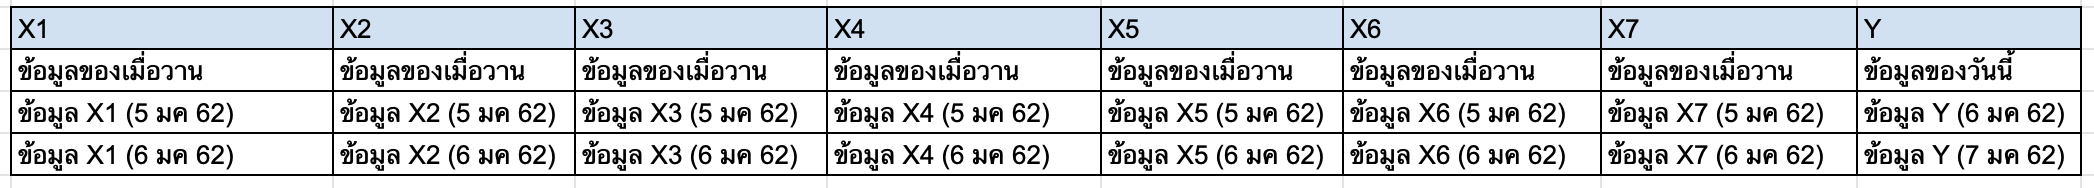



# ตารางบ้าน

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#import file  

In [ ]:
#คำตอบนักประเมิน(ID)
link1 = 'https://docs.google.com/spreadsheets/d/1F5Og-SUPEbjdMfIjyvsYkKE4tgvvOV6E/export?format=xlsx'
detachedhouse = pd.read_excel(link1,sheet_name='บ้าน')
secondhand = pd.read_excel(link1,sheet_name='secondhand')

#Data House
link2 = 'https://docs.google.com/spreadsheets/d/1UJA8RJhC20SVg0qcBs1iy2lLYk2_a8e7/export?format=xlsx'
H1 = pd.read_excel(link2,sheet_name='บ้านมือ1')
H2 = pd.read_excel(link2,sheet_name='บ้านมือ2')

#7-eleven.json
with open('/content/drive/MyDrive/MIDterm/Midterm/7-eleven.json') as json_file:
  seven = json.loads(json_file.read())

#school.json
with open('/content/drive/MyDrive/MIDterm/Midterm/school.json') as json_file:
  school = json.loads(json_file.read())

# data บ้าน

## บ้าน 1

In [ ]:
  H1 =H1[['id','latitude','longitude','number_of_rai','number_of_ngan','number_of_va','number_of_story','number_of_bedroom','number_of_bathroom','direction','furniture','usable_area','number_of_parking','sell_price']]

In [ ]:
H1['second_hand']= '1'

<ipython-input-26-b135a5070e7c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  H1['second_hand']= '1'


### แก้ missing

In [ ]:
H1.isnull().sum()

id                      0
latitude                9
longitude               9
number_of_rai         754
number_of_ngan        754
number_of_va           92
number_of_story         4
number_of_bedroom      10
number_of_bathroom     10
direction              88
furniture              88
usable_area            36
number_of_parking      21
sell_price             21
second_hand             0
dtype: int64

In [ ]:
#fill NA with 0
H1.fillna(0)

,id,latitude,longitude,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,number_of_parking,sell_price,second_hand
0,314.0,16.392304,102.827926,0.0,0.0,50.00,2.0,4.0,3.0,0.0,0.0,185.0,2.0,3950000.0,1
1,315.0,16.392304,102.827926,0.0,0.0,40.00,2.0,4.0,3.0,0.0,0.0,165.0,2.0,3250000.0,1
2,316.0,16.392304,102.827926,0.0,0.0,77.25,2.0,4.0,3.0,0.0,0.0,260.0,2.0,6300000.0,1
3,317.0,16.392304,102.827926,0.0,0.0,81.25,2.0,6.0,5.0,0.0,0.0,343.0,3.0,6900000.0,1
4,318.0,16.392304,102.827926,0.0,0.0,55.00,2.0,4.0,4.0,0.0,0.0,223.0,2.0,4490000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,62204519412ede001495e6cb,102.875722,16.484111,0.0,0.0,0.00,1.0,3.0,2.0,0.0,0.0,125.0,2.0,2290000.0,1
750,62201e6fa441d30014e1f350,102.850706,16.410972,0.0,0.0,0.00,1.0,3.0,2.0,0.0,0.0,70.0,2.0,2590000.0,1
751,5fa0e476a3326800191e29ea,102.614819,15.828671,0.0,0.0,0.00,1.0,3.0,2.0,0.0,0.0,120.0,2.0,1990000.0,1
752,5e9d6fa69f161600121b61b2,102.402141,15.808013,0.0,0.0,0.00,1.0,3.0,2.0,0.0,0.0,100.0,2.0,1990000.0,1


### แก้ outlier

In [ ]:
# ฟังก์ชันหา outlier
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

In [ ]:
# หาว่า columns ไหนมีค่าผิดปกติบ้าง
outliers = find_outliers_IQR(H1)
#print('number of outliers: '+ str(len(outliers)))
#print('max outlier value: '+ str(outliers.max()))
#print('min outlier value: '+ str(outliers.min()))

<ipython-input-29-c717c81b7c4c>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]


In [ ]:
# ลบ outlier 
Q1 = H1[['number_of_va','number_of_bathroom','usable_area','sell_price']].quantile(0.25)
Q3 = H1[['number_of_va','number_of_bathroom','usable_area','sell_price']].quantile(0.75)
IQR = Q3 - Q1
h1 = H1[~((H1 < (Q1 - 1.5 * IQR)) |(H1 > (Q3 + 1.5 * IQR))).any(axis=1)]
print('Old Shape: ', H1.shape)
print('New Shape: ', h1.shape)

Old Shape:  (754, 15)
New Shape:  (642, 15)


<ipython-input-31-400cb1159f1c>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  h1 = H1[~((H1 < (Q1 - 1.5 * IQR)) |(H1 > (Q3 + 1.5 * IQR))).any(axis=1)]


In [ ]:
h1.shape

(642, 15)

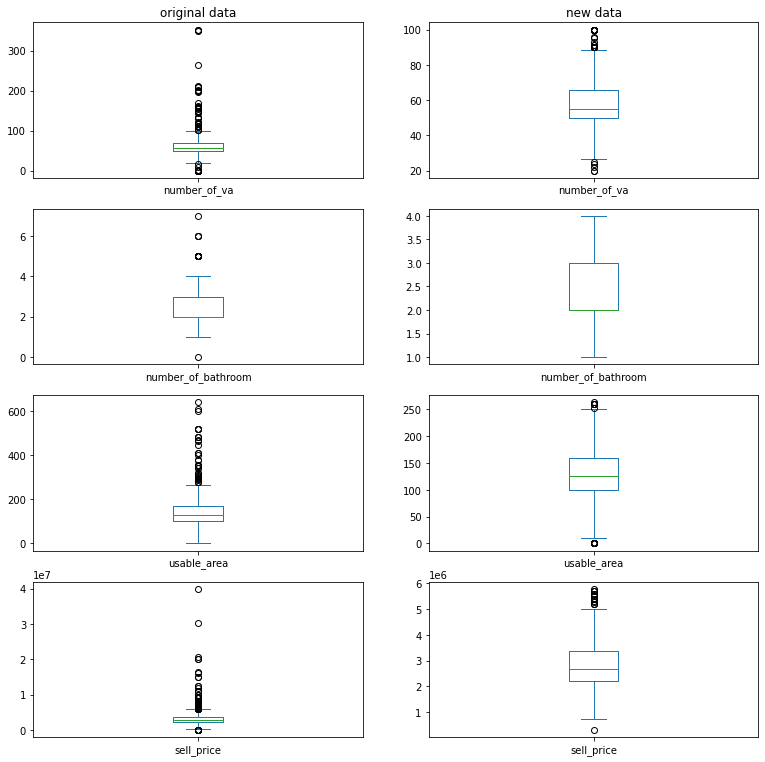

In [ ]:
plt.figure(figsize=(13,20))
plt.subplot(6,2,1)
plt.title('original data')
H1['number_of_va'].plot.box()
plt.subplot(6,2,2)
plt.title('new data')
h1['number_of_va'].plot.box();

plt.subplot(6,2,3)
H1['number_of_bathroom'].plot.box()
plt.subplot(6,2,4)
h1['number_of_bathroom'].plot.box();

plt.subplot(6,2,5)
H1['usable_area'].plot.box()
plt.subplot(6,2,6)
h1['usable_area'].plot.box();

plt.subplot(6,2,7)
H1['sell_price'].plot.box()
plt.subplot(6,2,8)
h1['sell_price'].plot.box();

## บ้าน 2

In [ ]:
  H2 =H2[['id','latitude','longitude','renovate','number_of_rai','number_of_ngan','number_of_va','number_of_story','number_of_bedroom','number_of_bathroom','direction','furniture','usable_area','number_of_parking','sell_price']]

In [ ]:
H2['second_hand']= '2'

<ipython-input-35-975a497ee29e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  H2['second_hand']= '2'


In [ ]:
H2.isnull().sum()

id                      0
latitude               22
longitude              22
renovate              211
number_of_rai           0
number_of_ngan          0
number_of_va            0
number_of_story       549
number_of_bedroom      27
number_of_bathroom      0
direction               0
furniture               0
usable_area           920
number_of_parking     215
sell_price              1
second_hand             0
dtype: int64

In [ ]:
# แก้ missing ด้วย fill NA with 0
H2.fillna(0)

,id,latitude,longitude,renovate,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,number_of_parking,sell_price,second_hand
0,1.0,16.139321,102.631587,no,0.0,1.0,45.0,2.0,2.0,2.0,ไม่ระบุ,ไม่มี,244.00,2.0,390000.0,2
1,4.0,16.676156,102.917998,no,0.0,0.0,88.0,1.0,1.0,1.0,ไม่ระบุ,ไม่มี,164.00,3.0,820000.0,2
2,16.0,16.129358,102.530670,no,1.0,0.0,8.0,1.0,11.0,11.0,ไม่ระบุ,ไม่ระบุ,489.00,9.0,3260000.0,2
3,18.0,16.459052,102.806404,no,0.0,0.0,61.6,2.0,3.0,3.0,ไม่ระบุ,ไม่ระบุ,203.00,2.0,5000000.0,2
4,19.0,16.450000,102.800680,no,0.0,0.0,72.3,2.0,3.0,2.0,ไม่ระบุ,ไม่ระบุ,164.00,2.0,3500000.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1651,20460P,16.480110,102.574033,no,0.0,0.0,73.0,1.0,2.0,1.0,ไม่ระบุ,ไม่ระบุ,108.76,0.0,437400.0,2
1652,20462P,16.528551,102.411762,no,0.0,0.0,84.0,1.0,2.0,1.0,ไม่ระบุ,ไม่ระบุ,119.00,0.0,714600.0,2
1653,20463P,15.867444,102.482085,no,0.0,1.0,45.0,2.0,1.0,1.0,ไม่ระบุ,ไม่ระบุ,188.50,0.0,451000.0,2
1654,20466P,16.636912,102.105343,no,0.0,1.0,59.0,2.0,1.0,1.0,ไม่ระบุ,ไม่ระบุ,207.00,0.0,910000.0,2


In [ ]:
# ลบ P จาก id
H2['id'] = H2['id'].apply(str).str.replace('P', '')

<ipython-input-38-b2c13593c80e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  H2['id'] = H2['id'].apply(str).str.replace('P', '')


In [ ]:
# ลบ ของเมือง, ทางทิศ, ทิศ จาก ตะวันออกเฉียงใต้ของเมือง, ทางทิศตะวันออก, ทิศตะวันออก, ทิศเหนือ
H2['direction'] = H2['direction'].apply(str).str.replace('ของเมือง', '')
H2['direction'] = H2['direction'].apply(str).str.replace('ทางทิศ', '')
H2['direction'] = H2['direction'].apply(str).str.replace('ทิศ', '')

In [ ]:
#one-hot-encoder # ยังไม่เสร็จ
# ทำ columns 'renovate' เป็น dummy
H2_dummies = pd.get_dummies(H2,  columns=['renovate','direction'])
H2_dummies

,id,latitude,longitude,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,furniture,...,renovate_ไม่ระบุ,direction_ตะวันตก,direction_ตะวันตกเฉียงเหนือ,direction_ตะวันตกเฉียงใต้,direction_ตะวันออก,direction_ตะวันออกเฉียงเหนือ,direction_ตะวันออกเฉียงใต้,direction_เหนือ,direction_ใต้,direction_ไม่ระบุ
0,1.0,16.139321,102.631587,0.0,1.0,45.0,2.0,2.0,2.0,ไม่มี,...,0,0,0,0,0,0,0,0,0,1
1,4.0,16.676156,102.917998,0.0,0.0,88.0,1.0,1.0,1.0,ไม่มี,...,0,0,0,0,0,0,0,0,0,1
2,16.0,16.129358,102.530670,1.0,0.0,8.0,1.0,11.0,11.0,ไม่ระบุ,...,0,0,0,0,0,0,0,0,0,1
3,18.0,16.459052,102.806404,0.0,0.0,61.6,2.0,3.0,3.0,ไม่ระบุ,...,0,0,0,0,0,0,0,0,0,1
4,19.0,16.450000,102.800680,0.0,0.0,72.3,2.0,3.0,2.0,ไม่ระบุ,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1651,20460,16.480110,102.574033,0.0,0.0,73.0,1.0,2.0,1.0,ไม่ระบุ,...,0,0,0,0,0,0,0,0,0,1
1652,20462,16.528551,102.411762,0.0,0.0,84.0,1.0,2.0,1.0,ไม่ระบุ,...,0,0,0,0,0,0,0,0,0,1
1653,20463,15.867444,102.482085,0.0,1.0,45.0,2.0,1.0,1.0,ไม่ระบุ,...,0,0,0,0,0,0,0,0,0,1
1654,20466,16.636912,102.105343,0.0,1.0,59.0,2.0,1.0,1.0,ไม่ระบุ,...,0,0,0,0,0,0,0,0,0,1
